In [1]:
import gym
import os

from datetime import datetime
from tensorforce import Environment, Agent, Runner
from tensorforce_pacman_env import tf_pacman_env

import ale_py.roms as roms
import tensorflow as tf
import tf_agents as tf_a
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Counts # of trace files in folder
_, _, files = next(os.walk("./pacman_traces"))
trace_count = len(files)

environment = Environment.create(environment=tf_pacman_env)
print(environment.reset())
agent = Agent.create(agent='ddqn', 
    environment=environment, 
    batch_size = 1, 
    memory = 10000,
    learning_rate=dict(
        type='exponential', unit='episodes', num_steps=1000,
        initial_value=0.01, decay_rate=0.5
    ),
    network = [
        dict(type = 'conv2d', size = 32, window = (8,8), stride = 4, bias = True, activation = "relu"),
        dict(type = 'conv2d', size = 64, window = (4,4), stride = 2, bias = True, activation = "relu"),
        dict(type = 'conv2d', size = 64, window = (3,3), stride = 1, bias = True, activation = "relu"),
        dict(type = 'pooling', reduction = 'max'),
        dict(type = 'dense',  size = 512, bias = True, activation = 'relu')
    ],
    exploration=1e-2,
    config=dict(device='GPU')
    ) 
print("Agent Created")
agent.pretrain(directory='pacman_traces', num_iterations=30, num_traces=trace_count, num_updates=1)
print("Agent pretrained")
environment.reset()

A.L.E: Arcade Learning Environment (version +978d2ce)
[Powered by Stella]


[[[ 88  88  67 ...  67  88  88]
  [146 146  43 ...  43 146 146]
  [146 146  43 ...  43 146 146]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[ 88  88  67 ...  67  88  88]
  [146 146  43 ...  43 146 146]
  [146 146  43 ...  43 146 146]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[ 88  88  67 ...  67  88  88]
  [146 146  43 ...  43 146 146]
  [146 146  43 ...  43 146 146]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[ 88  88  67 ...  67  88  88]
  [146 146  43 ...  43 146 146]
  [146 146  43 ...  43 146 146]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]]
Agent Created
Agent pretrained


array([[[ 88,  88,  67, ...,  67,  88,  88],
        [146, 146,  43, ...,  43, 146, 146],
        [146, 146,  43, ...,  43, 146, 146],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[ 88,  88,  67, ...,  67,  88,  88],
        [146, 146,  43, ...,  43, 146, 146],
        [146, 146,  43, ...,  43, 146, 146],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[ 88,  88,  67, ...,  67,  88,  88],
        [146, 146,  43, ...,  43, 146, 146],
        [146, 146,  43, ...,  43, 146, 146],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[ 88,  88,  67, ...,  67,  88,  88],
        [146, 146,  43, ...,  43, 146, 146],
        [146, 146,  43, ...,  43, 146, 146],
        ..

In [3]:
# env_name = 'ALE/MsPacman-v5'

# env = gym.make(env_name)
# env = gym.wrappers.AtariPreprocessing(
#     env,
#     noop_max = 30, 
#     frame_skip = 1, 
#     screen_size = 84, 
#     terminal_on_life_loss = False,
#     grayscale_obs = True, 
#     grayscale_newaxis = False, 
#     scale_obs = False)
# env = gym.wrappers.FrameStack(env, num_stack = 4)

environment._expect_receive = None
environment._actions = None

runner = Runner(agent=agent, environment=environment)
runner.run(num_episodes=250,  mean_horizon=5)

runner.run(num_episodes=1, evaluation=True)

Episodes:   0%|          | 0/250 [00:00, return=0.00, ts/ep=0, sec/ep=0.00, ms/ts=0.0, agent=0.0%]

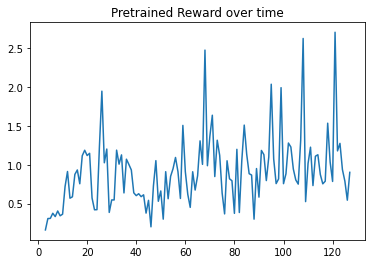

In [ ]:
run_reward_list = environment.episode_reward_list

plt.plot(list(range(len(run_reward_list))), run_reward_list)

z = np.polyfit(list(range(len(run_reward_list))), run_reward_list, 2)
p = np.poly1d(z)
plt.plot(list(range(len(run_reward_list))), p(range(len(run_reward_list))))

plt.xlabel = "Episode"
plt.ylabel = "Reward"
plt.title("Pretrained Reward over time")
plt.show()

In [ ]:
environment.reset()

environment._expect_receive = None
environment._actions = None

new_agent = Agent.create(agent='ddqn', 
    environment=environment, 
    batch_size = 1, 
    memory = 10000,
    learning_rate=dict(
        type='exponential', unit='episodes', num_steps=1000,
        initial_value=0.01, decay_rate=0.5
    ),
    network = [
        dict(type = 'conv2d', size = 32, window = (8,8), stride = 4, bias = True, activation = "relu"),
        dict(type = 'conv2d', size = 64, window = (4,4), stride = 2, bias = True, activation = "relu"),
        dict(type = 'conv2d', size = 64, window = (3,3), stride = 1, bias = True, activation = "relu"),
        dict(type = 'pooling', reduction = 'max'),
        dict(type = 'dense',  size = 512, bias = True, activation = 'relu')
    ],
    exploration=1e-2,
    config=dict(device='GPU')
    ) 

new_runner = Runner(agent=new_agent, environment=environment)
new_runner.run(num_episodes=250, mean_horizon=5)

new_runner.run(num_episodes=1, evaluation=True)

Episodes:   0%|          | 0/125 [00:00, return=0.00, ts/ep=0, sec/ep=0.00, ms/ts=0.0, agent=0.0%]

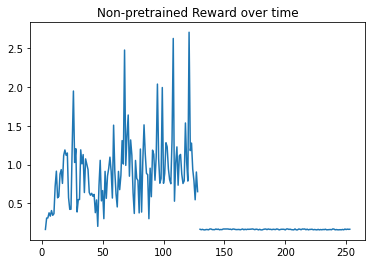

In [ ]:
run_reward_list = environment.episode_reward_list

plt.plot(list(range(len(run_reward_list))), run_reward_list)
plt.xlabel = "Episode"
plt.ylabel = "Reward"
plt.title("Non-pretrained Reward over time")
plt.show()